# SGD assignment 3

In [ ]:
# Dataset contains uber pickups in NYC from april to september 2014 and january to june 2015
#Link:
# easyjet.com/asp/EN/members/changeflightoptions.asp

# Base ->  TLC licensed business that dispatches TLC licensed for-hire vehicles

# Files we have

#   1) uber-raw-data-Month14 -> 6 files (1 per month) containing the following information:

#      Header	        Definition
#   Date/Time	    The date and time of the Uber pickup
#   Lat	            The latitude of the Uber pickup
#   Lon	            The longitude of the Uber pickup
#   Base	        The TLC base company code affiliated with the Uber pickup


#   2) uber-raw-data-janjune-15 contains the following information: 

#      Header	                Definition
# Dispatching_base_num	    The TLC base company code of the base that dispatched the Uber
# Pickup_date	            The date and time of the Uber pickup
# Affiliated_base_num	    The TLC base company code affiliated with the Uber pickup
# locationID	            The pickup location ID affiliated with the Uber pickup

# The Base codes are: 
# Base Code	  Base Name
# B02512	    Unter
# B02598	    Hinter
# B02617	    Weiter
# B02682	    Schmecken
# B02764	    Danach-NY
# B02765	    Grun
# B02835	    Dreist
# B02836	    Drinnen

#   3) Uber-jan-feb-FOIL contains the following information: 
# dispatching_base_number      date     active_vehicles        trips
# B02512                     1/1/2015        190                1132
# B02765                     1/1/2015        225                1765


# Ha mais ficheiros de Taxis e outras TLCs.

# Vou dividir agora 1 quadrado para cada coisa que deviamos fazer

In [ ]:
# Exploratory Data analysis

# Uber pickups divided by Base
# Uber pickups divided by day of week
# Uber pickups divided by hour of day
# Average rides per day | average ride per week

# Mark the pickups on a map
# Most frequent locations on HeatMap (Technique by tomas)

# Number of Uber pickups over time (Over the several days of the 6 months)

# Do Regression of the number of pickups over time

# Make sth with FOil file.. need to discuss what

## Imports

In [1]:
# Imports
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.basemap import Basemap
from geopy.geocoders import Nominatim
import geopandas as gpd
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


## Reading Data

In [2]:
# Reading dataset
# Uncomment your path, don't rewrite on the reads
pwd = '/home/pedro/workspace/UC/4ano/2semestre/SGD/project/sgd/data'
#pwd = '/home/francisco/Desktop/College/Mestrado/1º Ano/2o Semestre/SGD/Assignment3/'
uber_april_14 = pd.read_csv(pwd + '/uber-tlc-foil-response-master/uber-trip-data/uber-raw-data-apr14.csv')
uber_may_14 = pd.read_csv(pwd + '/uber-tlc-foil-response-master/uber-trip-data/uber-raw-data-may14.csv')
uber_jun_14 = pd.read_csv(pwd + '/uber-tlc-foil-response-master/uber-trip-data/uber-raw-data-jun14.csv')
uber_jul_14 = pd.read_csv(pwd + '/uber-tlc-foil-response-master/uber-trip-data/uber-raw-data-jul14.csv')
uber_aug_14 = pd.read_csv(pwd + '/uber-tlc-foil-response-master/uber-trip-data/uber-raw-data-aug14.csv')
uber_sep_14 = pd.read_csv(pwd + '/uber-tlc-foil-response-master/uber-trip-data/uber-raw-data-sep14.csv')

## Data treatment

In [ ]:
# Merging all 6 months datasets

uber_14 = pd.concat([uber_april_14, uber_may_14, uber_jun_14, uber_jul_14, uber_aug_14, uber_sep_14])

In [ ]:
uber_14['Date/Time'] = pd.to_datetime(uber_14['Date/Time'])

uber_14['Month'] = uber_14['Date/Time'].dt.month
uber_14['Day'] = uber_14['Date/Time'].dt.day
uber_14['Hour'] = uber_14['Date/Time'].dt.hour
uber_14['Week'] = uber_14['Date/Time'].dt.day_name()

In [ ]:
# Group by Days of week and count

uber_14.groupby(uber_14['Week']).count()

In [ ]:
# Group by Base and Count
uber_14.groupby(uber_14['Base']).count()

In [ ]:
# Group by Hours of Day
uber_14.groupby(uber_14['Hour']).count()

In [ ]:
#Group by Day-Month (Ammount of rides a day)
uber_14.groupby([(uber_14['Month']), (uber_14['Day'])]).count()


## Descriptive statistics

In [ ]:
#Average ride per day

avg_rides_per_day = uber_14.shape[0] / uber_14.groupby([(uber_14['Month']), (uber_14['Day'])]).size().shape[0]
avg_rides_per_day


# (Number of rides|Rows)
# uber_14.shape[0]  

# Number of Days
# uber_14.groupby([(uber_14['Month']), (uber_14['Day'])]).size().shape[0]


In [ ]:
#Average ride per week

avg_rides_per_day = uber_14.shape[0] / uber_14.groupby([(uber_14['Month']), (uber_14['Week'])]).size().shape[0]
avg_rides_per_day


# (Number of rides|Rows)
# uber_14.shape[0]  

# Number of Days
# uber_14.groupby([(uber_14['Month']), (uber_14['Day'])]).size().shape[0]

## Point Scatter and HeatMap

In [ ]:
corr = uber_14.corr()
plt.figure(figsize=(15,10))
hm = sns.heatmap(round(corr,2), annot=True, cmap="coolwarm")

#to solve the top and bottom cut problem 
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

plt.title('Correlation Heatmap', fontsize=14)

In [3]:
# Map information
plz_shape_df = gpd.read_file(pwd + '/shapefile/test/nyu_2451_34505/nyu_2451_34505.shp', dtype={'plz': str})

plz_shape_df = plz_shape_df.to_crs(epsg=4326)

# Point information
points = uber_april_14
gdf_listings = gpd.GeoDataFrame(points, geometry=gpd.points_from_xy(points["Lon"], points["Lat"]))

gdf_listings.head(5)


,Date/Time,Lat,Lon,Base,geometry
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,POINT (-73.95490 40.76900)
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,POINT (-74.03450 40.72670)
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,POINT (-73.98730 40.73160)
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512,POINT (-73.97760 40.75880)
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512,POINT (-73.97220 40.75940)


In [5]:
# Intercept
# points_fix = gdf_listings.loc[gdf_listings.is_valid]
sjoined_listings = gpd.sjoin(gdf_listings, plz_shape_df, op="within")

In [8]:
sjoined_listings.head()

,Date/Time,Lat,Lon,Base,geometry,index_right,tractid,tractnum,name,namelsad,nta,nta_name,bcode
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,POINT (-73.95490 40.76900),1223,36061012400,012400,124,Census Tract 124,MN31,Lenox Hill-Roosevelt Island,36061
15,4/1/2014 2:31:00,40.7666,-73.9531,B02512,POINT (-73.95310 40.76660),1223,36061012400,012400,124,Census Tract 124,MN31,Lenox Hill-Roosevelt Island,36061
388,4/1/2014 12:57:00,40.7657,-73.9549,B02512,POINT (-73.95490 40.76570),1223,36061012400,012400,124,Census Tract 124,MN31,Lenox Hill-Roosevelt Island,36061
428,4/1/2014 13:40:00,40.7651,-73.9531,B02512,POINT (-73.95310 40.76510),1223,36061012400,012400,124,Census Tract 124,MN31,Lenox Hill-Roosevelt Island,36061
494,4/1/2014 14:57:00,40.7682,-73.9530,B02512,POINT (-73.95300 40.76820),1223,36061012400,012400,124,Census Tract 124,MN31,Lenox Hill-Roosevelt Island,36061


In [10]:
grouped = sjoined_listings.groupby("tractid").size()
df = grouped.to_frame().reset_index()
df.columns = ["tractid", "uber_count"]

In [11]:
merged_areas = plz_shape_df.merge(df, on="tractid", how="outer")

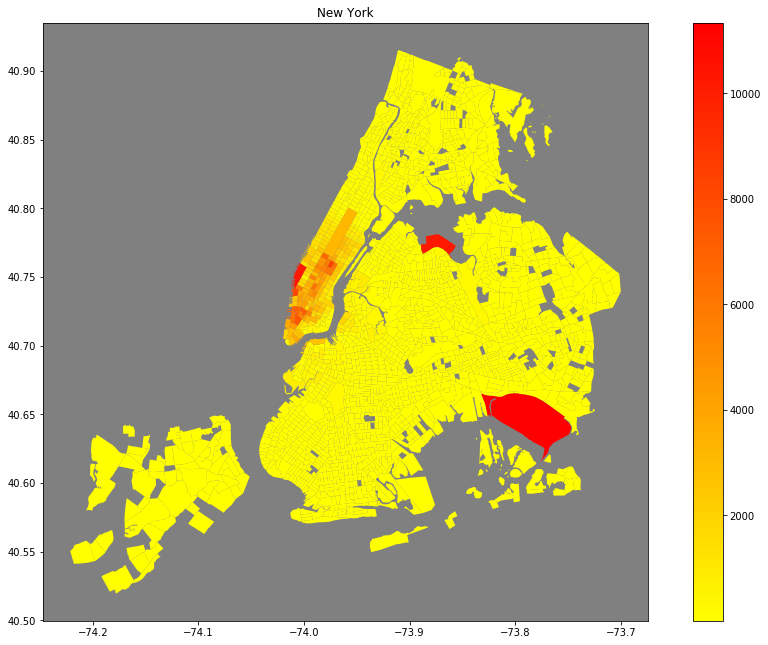

In [15]:
plt.rcParams['figure.figsize'] = [16, 11]

fig, ax = plt.subplots()

merged_areas.plot(ax=ax,
    column="uber_count", 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',)

lat = uber_april_14['Lat'].values
lon = uber_april_14['Lon'].values


#ax.scatter(
#        lon, 
#        lat, 
#        marker='o',
#        c='black', 
#        alpha=0.5
#    )

ax.set(
    title='New York', 
    aspect=1.3, 
   facecolor='grey'
);

In [ ]:
# Pega nos ficheiros dos taxis|TLCs e comparar com Uber might be intersting.. Need help here

In [ ]:
# Serie Temporal e|ou Clustering ?!? 